In [1]:
pip install emoji

In [2]:
from typing import Generator
import regex as rs
import emoji
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
def StartsWithDateAndTime(s):
  pattern = r"(/d){1,2}/[/d] {1,2}/[/d]{4}"
  result = rs.findall(pattern, s)
  print("result:",result)
  if result:
    return True
  else:
     False

In [4]:
def FineAuthor ():
  s =s.split(":")
  if len(s) == 2:
    return True
  else:
    return False

In [5]:
def getDataPoint (line):
  splitLine = line.split(' - ')
  DateTime = splitLine[0]
  Message = " ".join(splitLine[1:])
  if FineAuthor (Message):
    splitMessage = Message.split(":")
    Author = splitMessage[0]
  else:
    Author = None
  return DateTime, Author, Message

In [6]:
import re
def StartsWithDateAndTime(s):
  pattern = r"(/d){1,2}/[/d] {1,2}/\d{2,4},\d{1,2}:\d{2}[AP]M -"
  result = re.match(pattern, s)
  return bool(result)

def getDataPoint(line):
  splitLine = line.split(' - ')
  dateTime = splitLine[0]
  date, time = dateTime.split(', ')
  if ':' in message :
      splitMessage = message.split(':')
      author = splitMessage[0]
      message = " ".join(splitMessage[1:])
  else:
    author = None
  return date, time, author, message



In [7]:
from google.colab import files
parsedData = []
conversation = "/content/whatsapp_chat.txt"
with open(conversation, encoding="utf-8") as fp:
  fp.readline()
  print("fb.readline():\n", fp.readline())
  messageBuffer = []
  print("messageBuffer:\n",messageBuffer)
  date, time, author = None, None, None
  while True:
    line = fp.readline()
    if not line:
      break
    line = line.strip()
    print("line:\n",line)
    if StartsWithDateAndTime(line):
      print("startsWithDateAndTime: \n", startsWithDateAndTime)
      if len(messageBuffer) > 0:
        parsedData.append([date, time, author, ' '.join(messageBuffer)])
      messageBuffer.clear()
      date, time, author, message = getDataPoint(line)
      messageBuffer.append(message)
    else:
      messageBuffer.append(line)

Streaming output truncated to the last 5000 lines.
line:
 29/10/23, 9:17 pm - Amar Delhi: Haha. Ye neta ni hota nah to kutta b na puchhta
line:
 29/10/23, 9:17 pm - Amar Delhi: Dekh liya ka
line:
 29/10/23, 9:17 pm - Amar Delhi: 😂😂
line:
 29/10/23, 9:17 pm - `: Ha
line:
 29/10/23, 9:17 pm - `: Ha
line:
 29/10/23, 9:17 pm - Amar Delhi: Hm b. Maza ni aaya par
line:
 29/10/23, 9:17 pm - Amar Delhi: Kuch jyada h emotional bna diya
line:
 29/10/23, 9:18 pm - `: 😂😂 ha drama bhut h
line:
 29/10/23, 9:18 pm - `: Serial bna Diya h 😂😂
line:
 29/10/23, 9:18 pm - `: Wo gaye wo aaye
line:
 29/10/23, 9:18 pm - `: 😂😂
line:
 29/10/23, 9:19 pm - `: <Media omitted>
line:
 29/10/23, 9:19 pm - `: Kis angle se bold look u
line:
 29/10/23, 9:19 pm - `: H
line:
 29/10/23, 9:19 pm - `: Bto
line:
 29/10/23, 9:23 pm - Amar Delhi: Haan
line:
 29/10/23, 9:23 pm - Amar Delhi: Isko bolo khae. Inlogo ki wjh se malnutrition ka index kharab ho rha.😂
line:
 29/10/23, 9:24 pm - Amar Delhi: Bold ni..bad look
line:
 29/10

In [12]:
print(pd.__version__)

2.0.3


In [9]:
import pandas as pd

# Combine different approaches
try:
    df = pd.read_csv("/content/whatsapp_chat.txt", sep=',', on_bad_lines='skip')
    print(df.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")


   13/02/22  \
0  13/02/22   
1  13/02/22   
2  13/02/22   
3  13/02/22   
4  13/02/22   

   9:25 pm - Messages and calls are end-to-end encrypted. No one outside of this chat  \
0   9:25 pm - Amar calling created group "Trip to...                                    
1                   9:25 pm - Amar calling added you                                    
2   9:31 pm - Arnav Adi: Lodu sab call karte hain...                                    
3                   9:36 pm - Amar calling: Thik hai                                    
4          10:55 pm - Amar calling: Call karo pratik                                    

   not even WhatsApp  can read or listen to them. Tap to learn more.  
0                NaN                                             NaN  
1                NaN                                             NaN  
2                NaN                                             NaN  
3                NaN                                             NaN  
4                Na

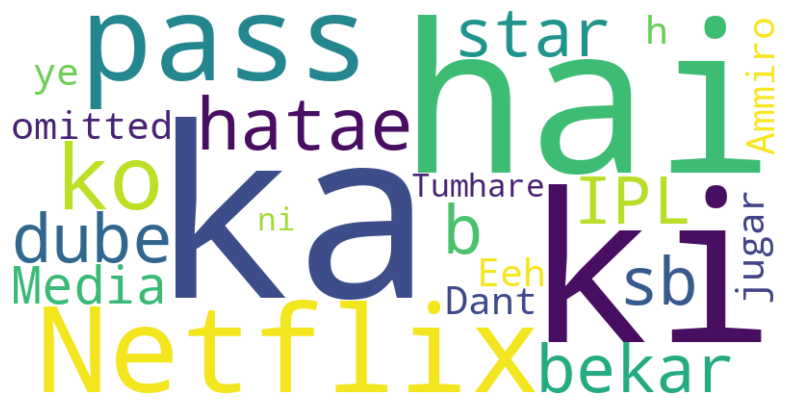

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# WhatsApp chat data
chat_data = """
09/06/24, 10:47 pm - Amar Delhi: Kis kis ko hatae
09/06/24, 10:47 pm - Amar Delhi: dube b bekar hai.
09/06/24, 11:02 pm - `: IPL star sb
15/06/24, 5:25 pm - Amar Delhi: <Media omitted>
15/06/24, 6:47 pm - `: 🤣🤣
21/06/24, 4:37 pm - Amar Delhi: Dant Netflix ka pass ka jugar hai ka
21/06/24, 4:46 pm - `: Ammiro ka h ye Netflix
21/06/24, 4:50 pm - Amar Delhi: Eeh
21/06/24, 4:50 pm - Amar Delhi: Tumhare pass hai ki ni😂😂🙄
"""

# Regex pattern to parse the chat data
pattern = r'(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2} [ap]m) - ([^:]+): (.+)'

# List to hold parsed data
parsed_data = []

# Parse the chat data
for line in chat_data.strip().split('\n'):
    match = re.match(pattern, line)
    if match:
        date, time, author, message = match.groups()
        parsed_data.append([date, time, author, message])

# Create DataFrame
df = pd.DataFrame(parsed_data, columns=['Date', 'Time', 'Author', 'Message'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Combine all messages into a single text
text = ' '.join(df['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

